## 3.3 对数几率回归
模型公式为： 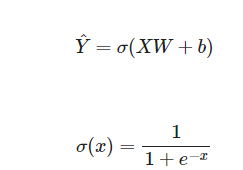
根据损失函数： 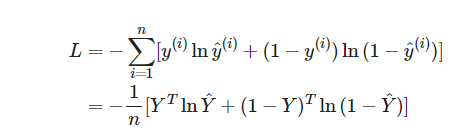
求得梯度：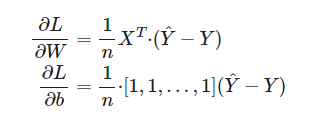

In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

class LogisticRegression:
    def __init__(self, lr: float = 0.5, threshold: float = 0.5, max_iter: int = 5000):
        self.lr = lr
        self.threshold = threshold
        self.max_iter = max_iter
        self.W = None
        self.b = None
        self.costs = []
        self.score = []

    def sigmoid(self, Z): 
        return 1 / (1 + np.exp(-Z))

    def fit(self, X_train, Y_train):
        Y_train = Y_train.reshape((-1, 1)) # 因为经过sigmoid计算后Y_hat形状为（n,1)，需要把Y_train转换成与之相同的

        n_sample = X_train.shape[0] # 样本个数
        n_feature = X_train.shape[1] # 每个样本的特征数
        print(n_sample)
        print(n_feature)

        self.W = 0.01*np.random.randn(n_feature).reshape((n_feature, 1))  # 权重 w shape为(2,1)
        self.b = 0  # 偏置
        y = Y_train
        for i in range(self.max_iter):
            Y_hat = self.sigmoid((np.dot(X_train, self.W) + self.b).astype('float32'))  # X为(n_sample,n_feature);Y_hat为(n_smaple,1)
            # if i == 10:
            #     print(Y_hat.shape)
            if i == 0:
                print(Y_hat)

            dW = X_train.T.dot(Y_hat - Y_train) / n_sample # 求W b对每个特征的梯度
            db = np.sum(Y_hat - Y_train) / n_sample
            # 计算训练损失 J(θ)=-(ln(L(θ)))/m  对数似然函数：L(θ)=Σ{ y*lny_hat + (1-y)ln(1-y_hat) } θ是需要求的参数具体就是 w和b
            cost = -np.sum(y * np.log(Y_hat) + (1 - y) * np.log(1 - Y_hat))/ n_sample  # 平均对数似然损失；
            if i%100 == 0:
                self.costs.append(cost) # 保存损失
            self.W = self.W - self.lr * dW # 根据参数更新公式更新权重和偏置
            self.b =self.b -  self.lr * db # 注意这里不要自加自减参考 https://blog.csdn.net/weixin_39278265/article/details/85148974

    def predict(self, X_test):
        # np.where(condition, x, y) 满足条件输出1，否则输出0
        return np.squeeze(np.where( self.sigmoid((np.dot(X_test, self.W) + self.b).astype('float32') ) >= self.threshold, 1, 0))


def ACC(Y_true, Y_pred):
    return np.sum(Y_true == Y_pred) / len(Y_true)




data = np.loadtxt('data2.txt',delimiter=',')
data = np.array(data)

# 定义变量
X = data[:,0:2] #前两列为数值，最后一列为标签
y = data[:,2]


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)
print(X_train.dtype)
lr_model = LogisticRegression(lr=0.1, threshold=0.5,max_iter=50000)
lr_model.fit(X_train, Y_train)

Y_pred = lr_model.predict(X_train)
print('Train_ACC:{}'.format(ACC(Y_train, Y_pred)))
print('Test_ACC:{}'.format(ACC(Y_test, lr_model.predict(X_test))))



float64
80
2
[[0.5000812 ]
 [0.49534908]
 [0.5023149 ]
 [0.5001072 ]
 [0.50259715]
 [0.49628147]
 [0.5003623 ]
 [0.50215876]
 [0.5016448 ]
 [0.4981056 ]
 [0.50058603]
 [0.5043315 ]
 [0.49700832]
 [0.4984636 ]
 [0.49793923]
 [0.49589115]
 [0.49694857]
 [0.49784285]
 [0.49831614]
 [0.50519955]
 [0.49876222]
 [0.50543785]
 [0.4966101 ]
 [0.49884847]
 [0.5037212 ]
 [0.49493963]
 [0.50270206]
 [0.49764106]
 [0.5010134 ]
 [0.4982451 ]
 [0.49824142]
 [0.4999597 ]
 [0.5043148 ]
 [0.5027177 ]
 [0.49930122]
 [0.50333893]
 [0.50046617]
 [0.50317806]
 [0.50138474]
 [0.49989632]
 [0.4978752 ]
 [0.50217515]
 [0.49825355]
 [0.50051755]
 [0.50089186]
 [0.4965858 ]
 [0.50071496]
 [0.49599737]
 [0.49926555]
 [0.5049804 ]
 [0.50148475]
 [0.50372523]
 [0.50005674]
 [0.5020267 ]
 [0.49999803]
 [0.49568874]
 [0.49915767]
 [0.50202996]
 [0.5026931 ]
 [0.4987831 ]
 [0.49886864]
 [0.4966721 ]
 [0.50439906]
 [0.49580747]
 [0.4952824 ]
 [0.5031158 ]
 [0.5005196 ]
 [0.4978312 ]
 [0.5040468 ]
 [0.49893335]
 [0.502

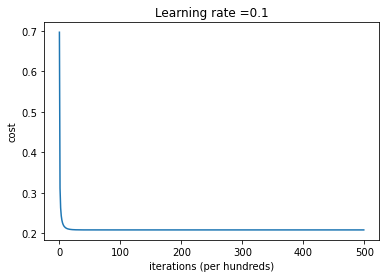

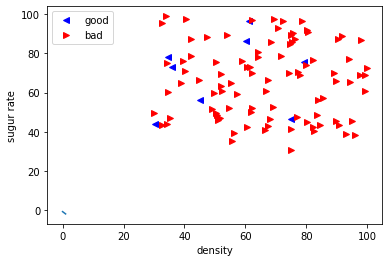

In [5]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title(f"Learning rate ={lr_model.lr}" )
plt.plot(lr_model.costs)

plt.figure(2)
p1, = plt.plot(data[0:8,0], data[0:8,1], 'b<')
p2, = plt.plot(data[8:,0], data[8:,1], 'r>')

plt.xlabel('density')
plt.ylabel('sugur rate')
plt.legend([p1, p2], ["good", "bad"], loc='upper left')

x1 = np.linspace(0,1,100)
x2 = (-lr_model.W[0]*x1 - lr_model.b)/lr_model.W[1] # 由y = w1x1+w2x2+b 令y=0根据x1求得x2

plt.plot(x1,x2)
plt.show()


## （3.4) 比较10折交叉验证和留一法
这一题使用3.3题中写的梯度下降的逻辑回归训练。

In [3]:
from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression as lrs
# 不使用sklearn的逻辑回归
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # 忽略因版本问题产生的警告

# 预处理鸢尾花数据集
# 预处理过程中剔除了第三种鸢尾花，仅保留了Iris-setosa 和Iris-versicolor两类鸢尾花。
iris_data = np.array(pd.read_csv('./ML_data/iris.data'))
# 数据中最后一列为鸢尾花种类，前四列为鸢尾花的花萼长度等数据。
iris_data = iris_data[iris_data[:, 4] != "Iris-virginica"] # 剔除了第三种鸢尾花
#数据中第一列为红酒产地编号，其余列为红酒产品的理化性质。
mapper = {"Iris-setosa": 0, "Iris-versicolor": 1}

for i in iris_data:
    i[4] = mapper[i[4]]

# 剔除了第三种产地的红酒，仅保留产地编号为0，1的两类红酒。
# 预处理红酒数据集 数据中第一列为红酒产地编号，其余列为红酒产品的理化性质。
wine_data = np.array(pd.read_csv('./ML_data/wine.data'))
# 前58个数据是1类，58到128是第二类
wine_data = wine_data[:129]
wine_data[:58,0] = 0
wine_data[58:,0] = 1
# 定义十折交叉验证筛选器 
kf = KFold(10, True)

def ACC(Y_true, Y_pred):
    return np.sum(Y_true == Y_pred) / Y_true.size # 这里用len()也可能报错
    
# 统计鸢尾花数据集十折交叉验证各模型分数
scores11 = []

for train, test in kf.split(iris_data):
    X_train, X_test = iris_data[train].astype('float64'), iris_data[test]
    # 使用3.3中自定义的逻辑回归类
    lr = LogisticRegression(lr=0.1, threshold=0.5,max_iter=5000)
    lr.fit(X_train[:, 0:3], X_train[:, 4].astype('int'))
    y_pred_test = lr.predict(X_test[:, 0:3])
    scores11.append(ACC(y_pred_test, X_test[:, 4].astype('int')))


# 统计红酒数据集十折交叉验证各模型分数
scores21 = []
lr_model = 0
costs = []
for train, test in kf.split(wine_data):
    X_train, X_test = wine_data[train], wine_data[test]
    lr = LogisticRegression(lr=0.5, threshold=0.1,max_iter=10000)
    lr.fit(X_train[:, 1:], X_train[:, 0].astype('int'))
    scores21.append(ACC(lr.predict(X_test[:, 1:]), X_test[:, 0].astype('int')))
    costs.extend(lr.costs)
plt.figure(1)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
# plt.title(f"Learning rate ={lr_model.lr}" )
plt.plot(costs)

# 定义鸢尾花数据集留一法筛选器
kf1 = KFold(iris_data.shape[0], True)

# 统计鸢尾花数据集留一法各模型分数
scores12 = []

for train, test in kf1.split(iris_data):
    X_train, X_test = iris_data[train], iris_data[test]
    lr = LogisticRegression(lr=0.5, threshold=0.5,max_iter=5000)
    lr.fit(X_train[:, 0:3], X_train[:, 4].astype('int'))
    y_pred_test = lr.predict(X_test[:, 0:3])
    scores12.append(ACC(y_pred_test, X_test[:, 4].astype('int')))

scores22 = []

# 定义红酒数据集留一法筛选器
kf2 = KFold(wine_data.shape[0], True)

# 统计红酒数据集留一法各模型分数
for train, test in kf2.split(wine_data):
    X_train, X_test = wine_data[train], wine_data[test]
    lr = LogisticRegression(lr=0.5, threshold=0.5,max_iter=10000)
    lr.fit(X_train[:, 1:], X_train[:, 0].astype('int'))
    scores22.append(ACC(lr.predict(X_test[:, 1:]), X_test[:, 0].astype('int')))

# 输出最终结果
print(f"iris: 十折平均错误率 {1 - np.mean(scores11)}, 留一法平均错误率{1 - np.mean(scores12)},\n"
      f"wine:十折平均错误率 {1 - np.mean(scores21)}, 留一法平均错误率{1 - np.mean(scores22)}")



FileNotFoundError: [Errno 2] No such file or directory: './ML_data/iris.data'

In [ ]:
# 使用sklearn库的逻辑回归结果
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression as lrs
import pandas as pd
import numpy as np

# 预处理鸢尾花数据集
iris_data = np.array(pd.read_csv('./ML_data/iris.data'))
# iris_data = iris_data[iris_data[:, 4] != "Iris-virginica"]
# mapper = {"Iris-setosa": 0, "Iris-versicolor": 1}
mapper = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica":2}

for i in iris_data:
    i[4] = mapper[i[4]]

# 预处理红酒数据集
wine_data = np.array(pd.read_csv('./ML_data/wine.data'))
wine_data = wine_data[:129]

# 定义十折交叉验证筛选器
kf = KFold(10, True)

# 统计鸢尾花数据集十折交叉验证各模型分数
scores11 = []

for train, test in kf.split(iris_data):
    X_train, X_test = iris_data[train], iris_data[test]
    lr = lrs()
    lr.fit(X_train[:, 0:3], X_train[:, 4].astype('int'))
    scores11.append(lr.score(X_test[:, 0:3], X_test[:, 4].astype('int')))


# 统计红酒数据集十折交叉验证各模型分数
scores21 = []

for train, test in kf.split(wine_data):
    X_train, X_test = wine_data[train], wine_data[test]
    lr = lrs()
    lr.fit(X_train[:, 1:], X_train[:, 0].astype('int'))
    scores21.append(lr.score(X_test[:, 1:], X_test[:, 0].astype('int')))

# 定义鸢尾花数据集留一法筛选器
kf1 = KFold(iris_data.shape[0], True)

# 统计鸢尾花数据集留一法各模型分数
scores12 = []

for train, test in kf1.split(iris_data):
    X_train, X_test = iris_data[train], iris_data[test]
    lr = lrs()
    lr.fit(X_train[:, 0:3], X_train[:, 4].astype('int'))
    scores12.append(lr.score(X_test[:, 0:3], X_test[:, 4].astype('int')))

scores22 = []

# 定义红酒数据集留一法筛选器
kf2 = KFold(wine_data.shape[0], True)

# 统计红酒数据集留一法各模型分数
for train, test in kf2.split(wine_data):
    X_train, X_test = wine_data[train], wine_data[test]
    lr = lrs()
    lr.fit(X_train[:, 1:], X_train[:, 0].astype('int'))
    scores22.append(lr.score(X_test[:, 1:], X_test[:, 0].astype('int')))

# 输出最终结果
print("iris:" + str(1 - np.mean(scores11)), str(1 - np.mean(scores12)),
      "wine:" + str(1 - np.mean(scores21)), str(1 - np.mean(scores22)))



## 3.5 线性判别分析

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = np.array([[0.697, 0.460, 1],
        [0.774, 0.376, 1],
        [0.634, 0.264, 1],
        [0.608, 0.318, 1],
        [0.556, 0.215, 1],
        [0.403, 0.237, 1],
        [0.481, 0.149, 1],
        [0.437, 0.211, 1],
        [0.666, 0.091, 0],
        [0.243, 0.267, 0],
        [0.245, 0.057, 0],
        [0.343, 0.099, 0],
        [0.639, 0.161, 0],
        [0.657, 0.198, 0],
        [0.360, 0.370, 0],
        [0.593, 0.042, 0],
        [0.719, 0.103, 0]])


def LDA(X0, X1):
    """
    给定训练集样例，设法将样例投影到一条直线上，使得同类样本投影点尽可能接近，异类尽可能远离
    Input:
        X0: np.array with shape [N1, d]
        X1: np.array with shape [N2, d]
    Return:
        omega: np.array with shape [1, d]. Optimal params of LDA.
    """
    #shape [1, d]
    u0 = np.mean(X0, axis=0, keepdims=True)
    u1 = np.mean(X1, axis=0, keepdims=True)
    Sw = (X0-u0).T @ (X0-u0) + (X1-u1).T @ (X1-u1) #实现公式3.33（类内散度矩阵）
    omega = np.linalg.inv(Sw) @ ((u0-u1).T) # sw的逆 书上公式3.39
    return omega

if __name__=="__main__":
    # read data from xls
    # work_book = pd.read_csv("watermelon_3a.csv", header=None)
    work_book = data
    positive_data = data[data[:,-1] == 1, :] # 最后一列为1的所有行为positive
    negative_data = data[data[:,-1] == 0, :] # 最后一列为1的所有行为negative
    print (positive_data)

    #LDA
    omega = LDA(negative_data[:, :-1], positive_data[:, :-1])

    #plot
    plt.plot(positive_data[:, 0], positive_data[:, 1], "bo")
    plt.plot(negative_data[:, 0], negative_data[:, 1], "r+")
    lda_left = 0
    lda_right = -(omega[0]*0.9) / omega[1]
    plt.plot([0, 0.9], [lda_left, lda_right], 'g-')

    plt.xlabel('density')
    plt.ylabel('sugar rate')
    plt.title("LDA")
    plt.show()
